<a href="https://colab.research.google.com/github/PSLMssGerd44/Works-/blob/main/Neuronal_Network_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
data_train=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/poker-hand-training-true.data',
                       names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','hand'])
data_test=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/poker-hand-testing.data',
                      names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','hand'])

In [ ]:
X=data_train.iloc[:,:-1].values
Y=data_train['hand'].values
X2=data_test.iloc[:,:-1].values                   #dicide datos
Y2=data_test['hand'].values

In [ ]:
X_train_s= scaler.fit_transform(X)
X_test_s = scaler.fit_transform(X2)                   #escala o "normaliza"

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(120,input_dim=10))
model.add(keras.layers.Dense(100,activation='relu'))                #crea el modelo y sus funciones
model.add(keras.layers.Dense(80,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])     #compila

In [ ]:
history1=model.fit(X_train_s,Y,epochs=50,validation_split=0.3,shuffle=False)        

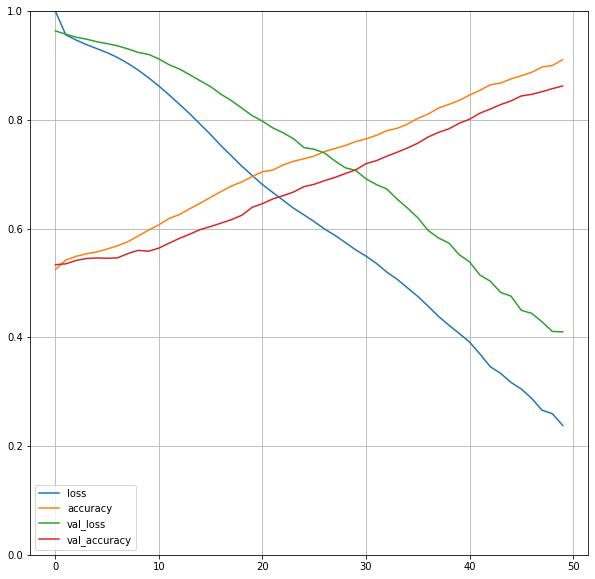

In [ ]:
pd.DataFrame(history1.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]        #usa el historial de pruebas para comparar datos de presición del modelo
plt.show()

In [ ]:
model_2= keras.models.Sequential([
                  keras.layers.Dense(120,input_dim=10,kernel_regularizer=keras.regularizers.l2(0.002)),
                  keras.layers.Dense(100,activation='relu',kernel_regularizer=keras.regularizers.l2(0.002)),      #utiliza l2 para regularizar
                  keras.layers.Dense(80,activation='relu',kernel_regularizer=keras.regularizers.l2(0.002)),
                  keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history2=model_2.fit(X_train_s,Y,epochs=50,validation_split=0.3,shuffle=False)

Epoch 1/50
548/548 [==============================] - 2s 3ms/step - loss: 1.2931 - accuracy: 0.5227 - val_loss: 1.1276 - val_accuracy: 0.5286
Epoch 2/50
548/548 [==============================] - 2s 4ms/step - loss: 1.0705 - accuracy: 0.5412 - val_loss: 1.0336 - val_accuracy: 0.5317
Epoch 3/50
548/548 [==============================] - 2s 4ms/step - loss: 1.0146 - accuracy: 0.5450 - val_loss: 1.0009 - val_accuracy: 0.5365
Epoch 4/50
548/548 [==============================] - 2s 3ms/step - loss: 0.9931 - accuracy: 0.5477 - val_loss: 0.9862 - val_accuracy: 0.5371
Epoch 5/50
548/548 [==============================] - 2s 3ms/step - loss: 0.9829 - accuracy: 0.5505 - val_loss: 0.9782 - val_accuracy: 0.5397
Epoch 6/50
548/548 [==============================] - 2s 3ms/step - loss: 0.9768 - accuracy: 0.5509 - val_loss: 0.9730 - val_accuracy: 0.5434
Epoch 7/50
548/548 [==============================] - 2s 3ms/step - loss: 0.9726 - accuracy: 0.5504 - val_loss: 0.9691 - val_accuracy: 0.5451
Epoch 

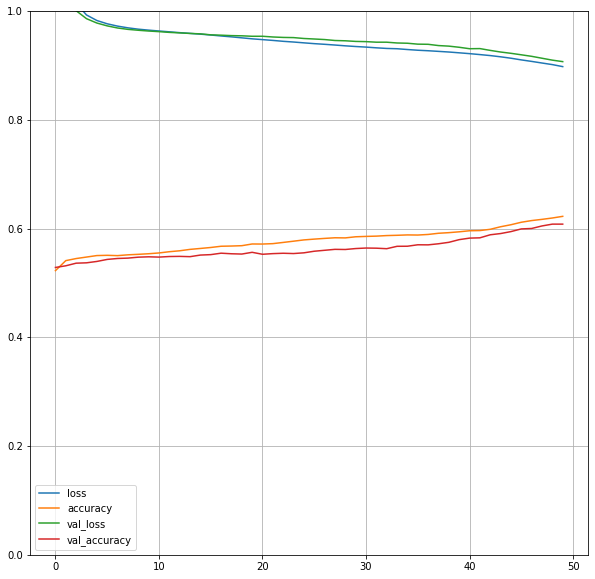

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1)#este es el rango vertical
plt.show()